# Forest Fire Burnt Area Prediction Problem

**Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the dataset**

In [ ]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**Understanding the size of the dataset**

In [ ]:
df.shape

(517, 13)

**Identifying Duplicate Records** 

In [ ]:
df.duplicated().sum()

4

**Removing Duplicate Records**

In [ ]:
df = df.drop_duplicates(keep='last')

**Duplicate Records Removed**

In [ ]:
df.duplicated().sum()

0

**Identifying Null/Missing Values of "NaN" type**

In [ ]:
df.isnull().sum()*100/len(df)

X        0.0
Y        0.0
month    0.0
day      0.0
FFMC     0.0
DMC      0.0
DC       0.0
ISI      0.0
temp     0.0
RH       0.0
wind     0.0
rain     0.0
area     0.0
dtype: float64

**No null/missing values of "NaN" type to handle**

**Identifying null values of string format like "???" or "unknown"**

In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC      object
DMC      float64
DC        object
ISI      float64
temp     float64
RH        object
wind     float64
rain     float64
area     float64
dtype: object

**FFMC should be a "float64" dtype but it has null values in string format and so it has a dtype of "object".**

**DC should be a "float64" dtype but it has null values in string format and so it has a dtype of "object".**

**RH should be a "float64" dtype but it has null values in string format and so it has a dtype of "object".**

**So we check out what representation of null values is used in the feature by using unique() method.**

In [ ]:
def null_identifier(df, column):
  return df[column].unique()

null_identifier(df, 'FFMC')

array(['86.2', '90.6', '91.7', '89.3', '92.3', '91.5', '91', '?', '92.5',
       '92.8', '63.5', '90.9', '92.9', '93.3', '84.9', '89.2', '86.3',
       '91.8', '94.3', '90.2', '93.5', '91.4', '92.4', '93.4', '88.6',
       '90.3', '90', '88.1', '79.5', '94.8', '90.1', '94.2', '87.2',
       '87.6', '92.1', '92.6', '84', '86.6', '91.1', '91.2', '88.8',
       '84.2', '89.7', '83.9', '69', '82.1', '85.9', '93', '84.4', '68.2',
       '93.7', '85.8', '95.5', '95.2', '96', '85.6', '81.5', '86.8',
       '93.9', '90.8', '90.7', '88.3', '92.2', '81.9', '88', '83', '93.1',
       '91.9', '91.6', '87.5', '93.6', '84.6', '85.4', '84.7', '86.9',
       '85.2', '90.4', '53.4', '85.1', '89.6', '50.4', '88.2', '92',
       '18.7', '90.5', '84.1', '85', '87.9', '94.6', '87.1', '92.7',
       '88.9', '89.4', '94', '75.1', '91.3', '93.2', '94.9', '95', '95.1',
       '95.8', '95.9', '96.2', '96.1', '94.5', '81.6', '94.4'],
      dtype=object)

In [ ]:
null_identifier(df, 'DC')

array(['94.3', '669.1', '686.9', '77.5', '102.2', '488', '495.6', '608.2',
       '692.6', '698.6', '713', '665.3', '686.5', '699.6', '713.9',
       '80.8', '664.2', '70.8', '97.1', '724.3', '200', '?', '594.2',
       '601.4', '668', '721.4', '728.6', '692.3', '709.9', '706.8',
       '718.3', '730.2', '682.6', '67.6', '366.7', '624.2', '647.1',
       '735.7', '442.9', '64.7', '103.8', '706.4', '631.2', '654.1',
       '661.3', '691.8', '34', '43', '466.6', '638.8', '614.5', '26.6',
       '529.8', '561.6', '704.4', '30.2', '15.5', '674.4', '9.3', '57.3',
       '74.3', '86.6', '680.7', '671.9', '673.8', '87.2', '685.2',
       '313.4', '513.3', '296.3', '578.8', '433.3', '355.2', '424.1',
       '100.4', '55', '570.5', '97.8', '609.6', '55.2', '48.3', '696.1',
       '586.7', '89.4', '92.4', '83.7', '32.1', '309.9', '480.8', '7.9',
       '43.5', '85.3', '589.9', '700.7', '503.6', '666.7', '565.5',
       '621.7', '694.8', '581.1', '542', '573', '629.1', '684.4', '550.3',
       '6

In [ ]:
null_identifier(df, 'RH')

array(['51', '33', '97', '99', '29', '27', '86', '63', '40', '38', '72',
       '42', '21', '44', '47', '35', '43', '32', '60', '34', '48', '24',
       '39', '78', '37', '62', '54', '74', '70', '36', '46', '17', '45',
       '50', '59', '31', '?', '25', '30', '79', '66', '19', '15', '22',
       '64', '87', '52', '56', '18', '49', '58', '53', '28', '41', '67',
       '26', '68', '96', '73', '57', '75', '20', '84', '55', '61', '90',
       '94', '77', '100', '71', '80', '88', '65', '76', '82', '69'],
      dtype=object)

In [ ]:
null_identifier(df, 'month')

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', '?', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [ ]:
null_identifier(df, 'day')

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu', '?'], dtype=object)

**Handling Missing/Null Values**

In [ ]:
df1 = df.copy()
df1 = df[df.FFMC!="?"]
df1['FFMC'] = df1['FFMC'].astype(float)
ffmc_mean = df1['FFMC'].mean()

df1 = df[df.DC!="?"]
df1['DC'] = df1['DC'].astype(float)
dc_mean = df1['DC'].mean()

df1 = df[df.RH!="?"]
df1['RH'] = df1['RH'].astype(float)
rh_mean = df1['RH'].mean()

<ipython-input-14-5e3be9e1a4e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FFMC'] = df1['FFMC'].astype(float)
<ipython-input-14-5e3be9e1a4e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DC'] = df1['DC'].astype(float)
<ipython-input-14-5e3be9e1a4e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
df1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [ ]:
#Handling Null Values with Mean
df['FFMC'] = df['FFMC'].replace("?", ffmc_mean)
df['DC'] = df['DC'].replace("?", dc_mean)
df['RH'] = df['RH'].replace("?", rh_mean)

#Handling Null Values with Mode
df['month'] = df['month'].replace("?", df['month'].mode()[0])
df['day'] = df['day'].replace("?", df['day'].mode()[0])

In [ ]:
df['FFMC'] = df['FFMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['RH'] = df['RH'].astype(float)

In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH       float64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
null_identifier(df, 'FFMC')

array([86.2       , 90.6       , 91.7       , 89.3       , 92.3       ,
       91.5       , 91.        , 90.63438114, 92.5       , 92.8       ,
       63.5       , 90.9       , 92.9       , 93.3       , 84.9       ,
       89.2       , 86.3       , 91.8       , 94.3       , 90.2       ,
       93.5       , 91.4       , 92.4       , 93.4       , 88.6       ,
       90.3       , 90.        , 88.1       , 79.5       , 94.8       ,
       90.1       , 94.2       , 87.2       , 87.6       , 92.1       ,
       92.6       , 84.        , 86.6       , 91.1       , 91.2       ,
       88.8       , 84.2       , 89.7       , 83.9       , 69.        ,
       82.1       , 85.9       , 93.        , 84.4       , 68.2       ,
       93.7       , 85.8       , 95.5       , 95.2       , 96.        ,
       85.6       , 81.5       , 86.8       , 93.9       , 90.8       ,
       90.7       , 88.3       , 92.2       , 81.9       , 88.        ,
       83.        , 93.1       , 91.9       , 91.6       , 87.5 

In [ ]:
null_identifier(df, 'DC')

array([ 94.3       , 669.1       , 686.9       ,  77.5       ,
       102.2       , 488.        , 495.6       , 608.2       ,
       692.6       , 698.6       , 713.        , 665.3       ,
       686.5       , 699.6       , 713.9       ,  80.8       ,
       664.2       ,  70.8       ,  97.1       , 724.3       ,
       200.        , 550.49271654, 594.2       , 601.4       ,
       668.        , 721.4       , 728.6       , 692.3       ,
       709.9       , 706.8       , 718.3       , 730.2       ,
       682.6       ,  67.6       , 366.7       , 624.2       ,
       647.1       , 735.7       , 442.9       ,  64.7       ,
       103.8       , 706.4       , 631.2       , 654.1       ,
       661.3       , 691.8       ,  34.        ,  43.        ,
       466.6       , 638.8       , 614.5       ,  26.6       ,
       529.8       , 561.6       , 704.4       ,  30.2       ,
        15.5       , 674.4       ,   9.3       ,  57.3       ,
        74.3       ,  86.6       , 680.7       , 671.9 

In [ ]:
null_identifier(df, 'RH')

array([ 51.        ,  33.        ,  97.        ,  99.        ,
        29.        ,  27.        ,  86.        ,  63.        ,
        40.        ,  38.        ,  72.        ,  42.        ,
        21.        ,  44.        ,  47.        ,  35.        ,
        43.        ,  32.        ,  60.        ,  34.        ,
        48.        ,  24.        ,  39.        ,  78.        ,
        37.        ,  62.        ,  54.        ,  74.        ,
        70.        ,  36.        ,  46.        ,  17.        ,
        45.        ,  50.        ,  59.        ,  31.        ,
        44.45579568,  25.        ,  30.        ,  79.        ,
        66.        ,  19.        ,  15.        ,  22.        ,
        64.        ,  87.        ,  52.        ,  56.        ,
        18.        ,  49.        ,  58.        ,  53.        ,
        28.        ,  41.        ,  67.        ,  26.        ,
        68.        ,  96.        ,  73.        ,  57.        ,
        75.        ,  20.        ,  84.        ,  55.  

**Missing/Null Values Handled**

In [ ]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

**Univariate Analysis**

**1. df.describe**


In [ ]:
df.describe() 

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.634381,110.989279,550.492717,9.023587,18.887524,44.455796,4.010526,0.021832,12.891598
std,2.320059,1.230925,5.538693,64.191013,245.903361,4.575543,5.828128,16.309402,1.796613,0.297107,63.892586
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,442.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Analysis:**
1. Majority FFMC values lie between 90-92
2. Majority DMC values lie between 68-143
3. Majority DC values lie between 442-713
4. Majority ISI values lie between 6.5-10.8
5. Majority temp values lie between 15.5-22.8
6. Majority RH values lie between 33-53
7. Majority wind values lie between 2.7-4.9
8. Majority rain values are 0
9. Majority area values lie between 0-6.57

**2. Stripplot**

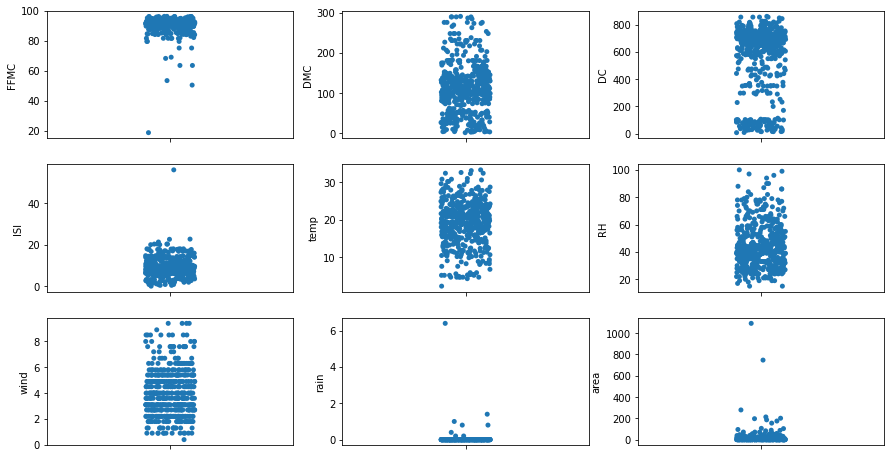

In [ ]:
plt.figure(figsize=(15, 8))

plt.subplot(3, 3, 1)
sns.stripplot(y=df['FFMC'])

plt.subplot(3, 3, 2)
sns.stripplot(y=df['DMC'])

plt.subplot(3, 3, 3)
sns.stripplot(y=df['DC'])

plt.subplot(3, 3, 4)
sns.stripplot(y=df['ISI'])

plt.subplot(3, 3, 5)
sns.stripplot(y=df['temp'])

plt.subplot(3, 3, 6)
sns.stripplot(y=df['RH'])

plt.subplot(3, 3, 7)
sns.stripplot(y=df['wind'])

plt.subplot(3, 3, 8)
sns.stripplot(y=df['rain'])

plt.subplot(3, 3, 9)
sns.stripplot(y=df['area'])

**Analysis:**
1. FFMC, ISI, Rain and Area are highle skewed features as majority of values fall in the same range.
2. All other features have values which are more or less scattered across their range.

**3. Histplot**

Text(0, 0.5, 'Count')

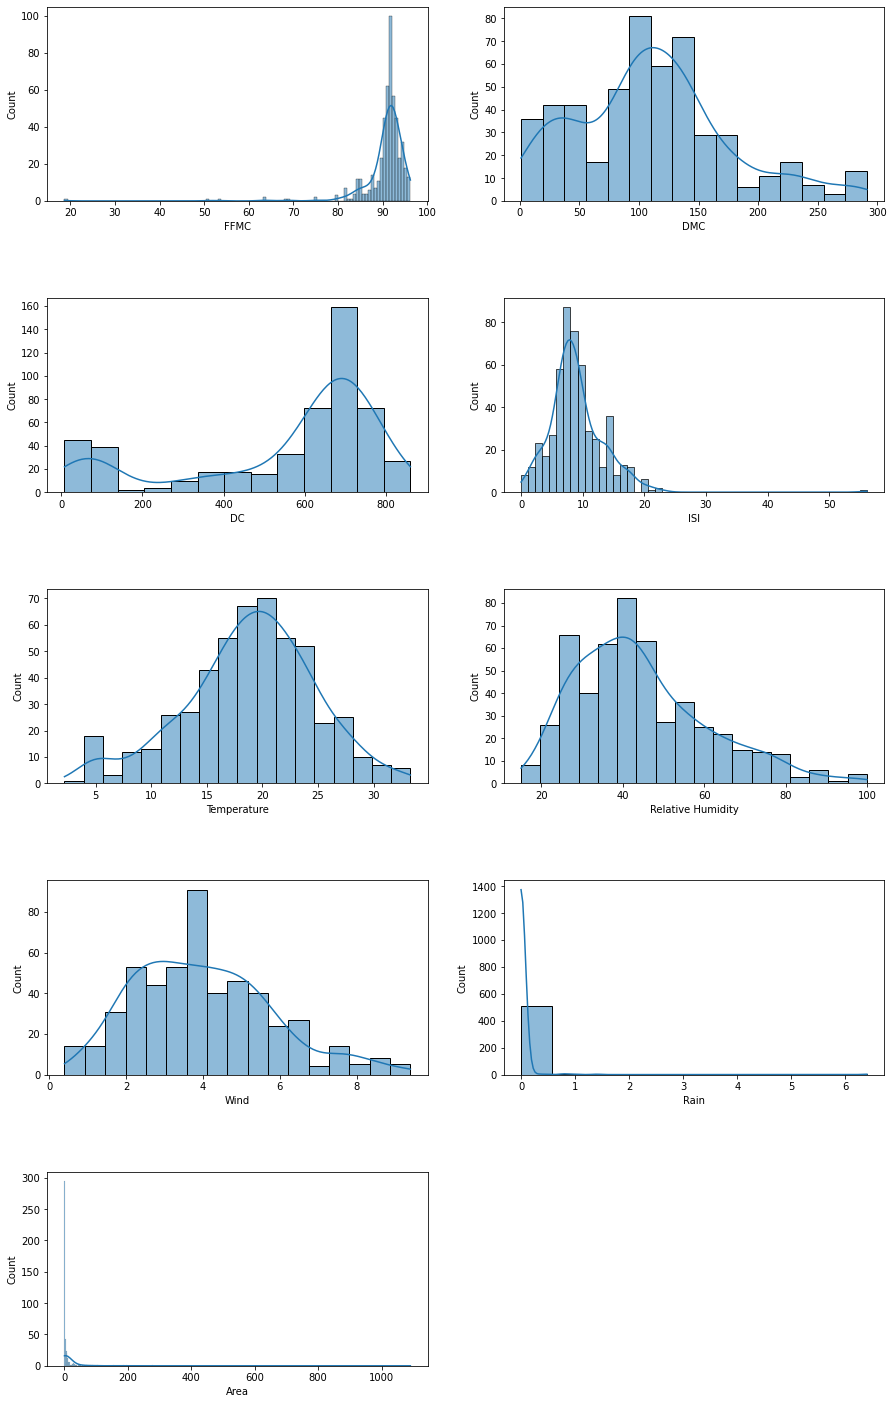

In [ ]:
plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)

plt.subplot(5, 2, 1)
sns.histplot(df['FFMC'], kde=True)
plt.xlabel("FFMC")
plt.ylabel("Count")

plt.subplot(5, 2, 2)
sns.histplot(df['DMC'], kde=True)
plt.xlabel("DMC")
plt.ylabel("Count")

plt.subplot(5, 2, 3)
sns.histplot(df['DC'], kde=True)
plt.xlabel("DC")
plt.ylabel("Count")

plt.subplot(5, 2, 4)
sns.histplot(df['ISI'], kde=True)
plt.xlabel("ISI")
plt.ylabel("Count")

plt.subplot(5, 2, 5)
sns.histplot(df['temp'], kde=True)
plt.xlabel("Temperature")
plt.ylabel("Count")

plt.subplot(5, 2, 6)
sns.histplot(df['RH'], kde=True)
plt.xlabel("Relative Humidity")
plt.ylabel("Count")

plt.subplot(5, 2, 7)
sns.histplot(df['wind'], kde=True)
plt.xlabel("Wind")
plt.ylabel("Count")

plt.subplot(5, 2, 8)
sns.histplot(df['rain'], kde=True)
plt.xlabel("Rain")
plt.ylabel("Count")

plt.subplot(5, 2, 9)
sns.histplot(df['area'], kde=True)
plt.xlabel("Area")
plt.ylabel("Count")

**Analysis:**
1. Through histogram we can analyze how many instance have a particular value in a feature.
For example, we can clearly see that 500 instances have values ranging between 0-100.
2. Almost 110 instances have wind values between 5-6.
3. We can see that FMMC, Area, Rain are having highly skewed data. 
4. Relative Humidity and DC are also have skewed data. 

Almost all the features have either left or right skewed data.

**4. Distplot:**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

Text(0.5, 0, 'Area')

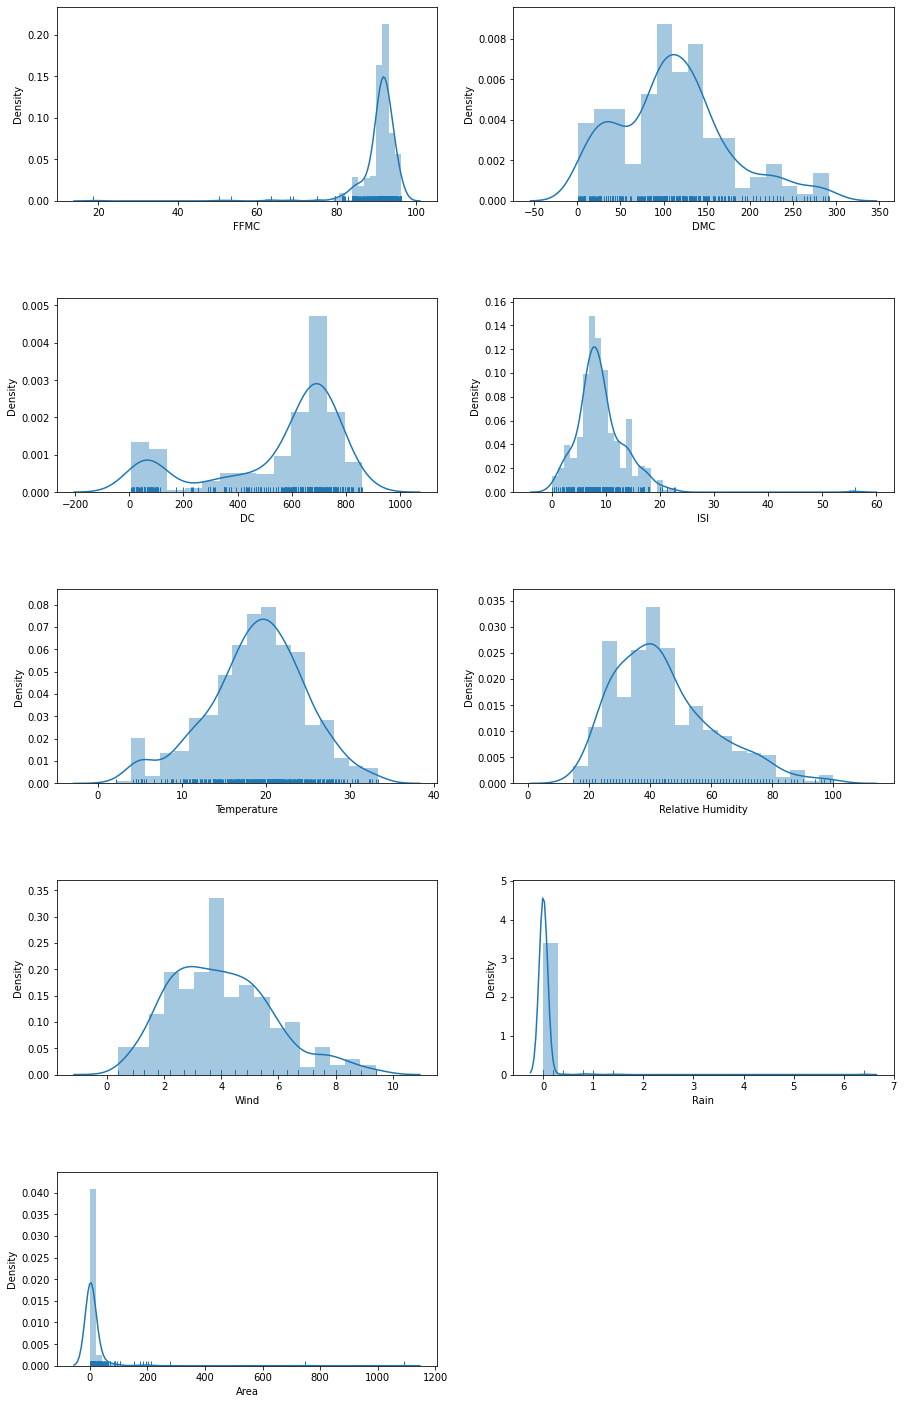

In [ ]:
plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)

plt.subplot(5, 2, 1)
sns.distplot(df['FFMC'], rug=True)
plt.xlabel("FFMC")

plt.subplot(5, 2, 2)
sns.distplot(df['DMC'], rug=True)
plt.xlabel("DMC")

plt.subplot(5, 2, 3)
sns.distplot(df['DC'], rug=True)
plt.xlabel("DC")

plt.subplot(5, 2, 4)
sns.distplot(df['ISI'], rug=True)
plt.xlabel("ISI")

plt.subplot(5, 2, 5)
sns.distplot(df['temp'], rug=True)
plt.xlabel("Temperature")

plt.subplot(5, 2, 6)
sns.distplot(df['RH'], rug=True)
plt.xlabel("Relative Humidity")

plt.subplot(5, 2, 7)
sns.distplot(df['wind'], rug=True)
plt.xlabel("Wind")

plt.subplot(5, 2, 8)
sns.distplot(df['rain'], rug=True)
plt.xlabel("Rain")

plt.subplot(5, 2, 9)
sns.distplot(df['area'], rug=True)
plt.xlabel("Area")

**Analysis:**
1. Distplot gives a combined result of KDE Plot and Rug Plot. 
2. Through the above distplot we can collect multiple inferences about the distribution of data for a particular feature, its density at particular values and total number of instances having a particular value. 

**Bivariate Analysis:**

**1. Heatmap:**

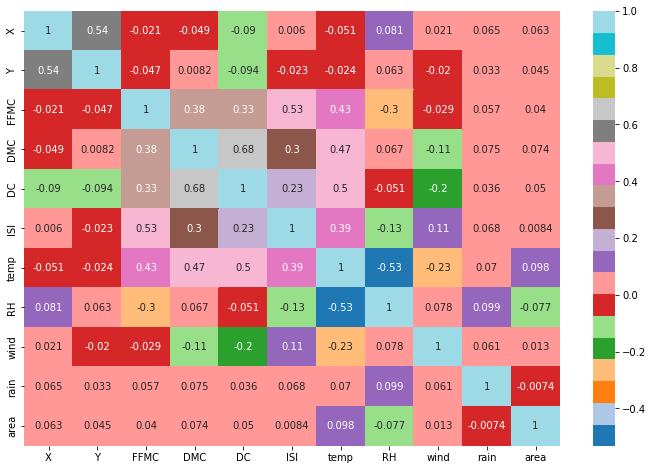

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="tab20", annot=True)

**Analysis:**
1. We can see that the numerical features have some correlation with each other.
2. Features ISI and FFMC have a good correlation of 0.53.
3. Features DC and DMC have a good correlation of 0.68.
4. Features ISI and FFMC have a good correlation of 0.53.
5. Features X and Y have a good correlation of 0.54.
6. Features RH and temp have a good correlation of -0.53.
Negative correlation indicates that those features are inversely proportional.
Positive correlation indicates that those features are directly proportional.

**2. Scatterplot:**

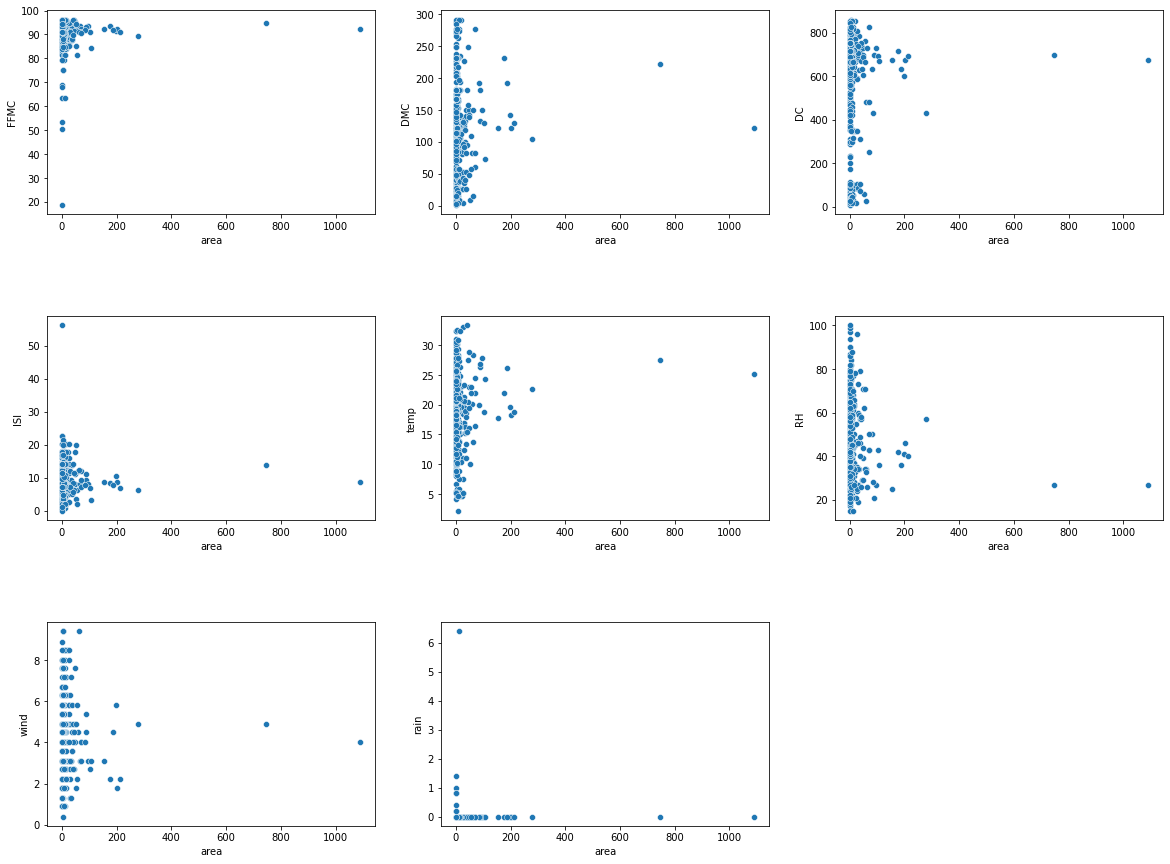

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3, 3, 1)
sns.scatterplot(x = df['area'], y = df['FFMC'], data=df)

plt.subplot(3, 3, 2)
sns.scatterplot(x = df['area'], y = df['DMC'], data=df)

plt.subplot(3, 3, 3)
sns.scatterplot(x = df['area'], y = df['DC'], data=df)

plt.subplot(3, 3, 4)
sns.scatterplot(x = df['area'], y = df['ISI'], data=df)

plt.subplot(3, 3, 5)
sns.scatterplot(x = df['area'], y = df['temp'], data=df)

plt.subplot(3, 3, 6)
sns.scatterplot(x = df['area'], y = df['RH'], data=df)

plt.subplot(3, 3, 7)
sns.scatterplot(x = df['area'], y = df['wind'], data=df)

plt.subplot(3, 3, 8)
sns.scatterplot(x = df['area'], y = df['rain'], data=df)

**Analysis:**
1. From the above scatterplots we can easily infer that in most cases (not all) the area of fire propagation or burnt area is going to lie between 0-10 hectares.

**3. KDE Plot:**


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


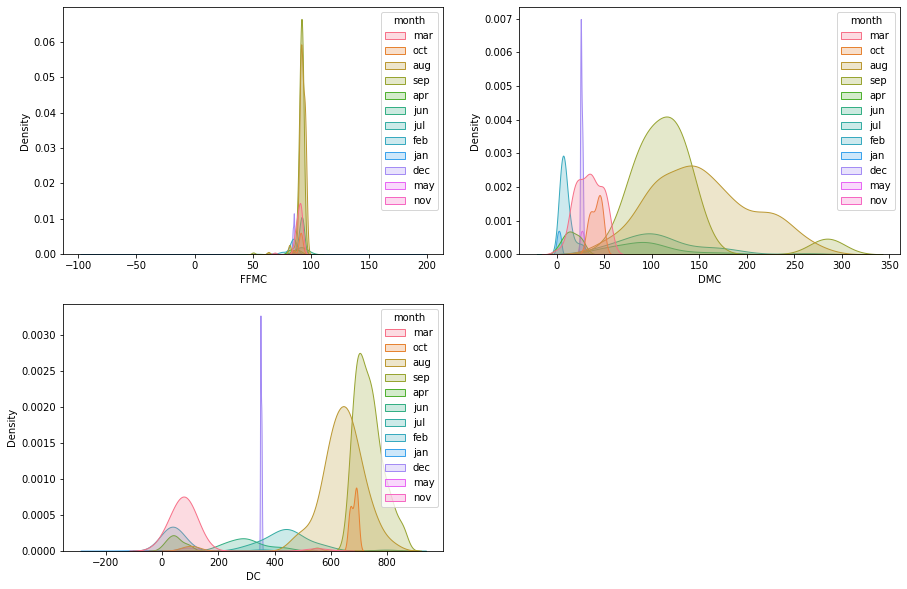

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='FFMC', hue='month', fill=True)

plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='DMC', hue='month', fill=True)

plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x='DC', hue='month', fill=True)

**Analysis:**
1. The above KDE Plot helps us in analyzing patterns about the values of different parameters in different months.

**4. Count Plot:**


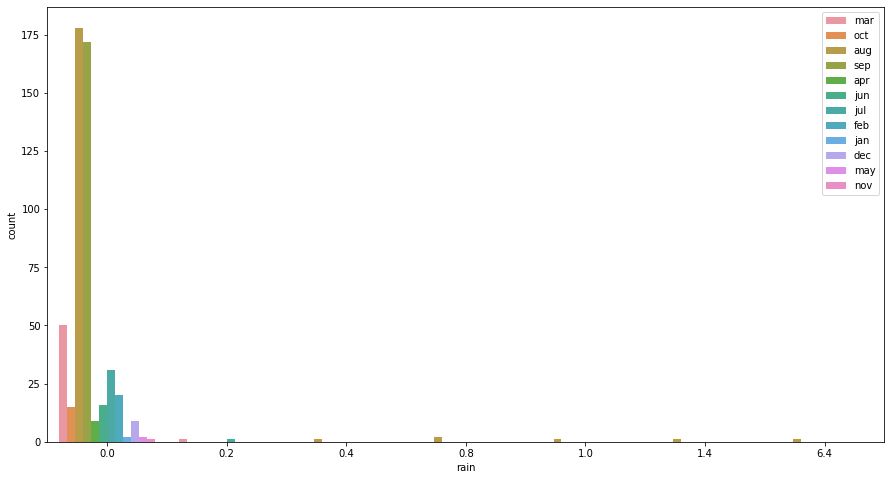

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['rain'], hue=df['month'])
plt.legend(loc="upper right")

**Analysis:**
1. This countplot shows the amount of rain received in each month.

**5. Line Chart:**

Text(0, 0.5, 'Area')

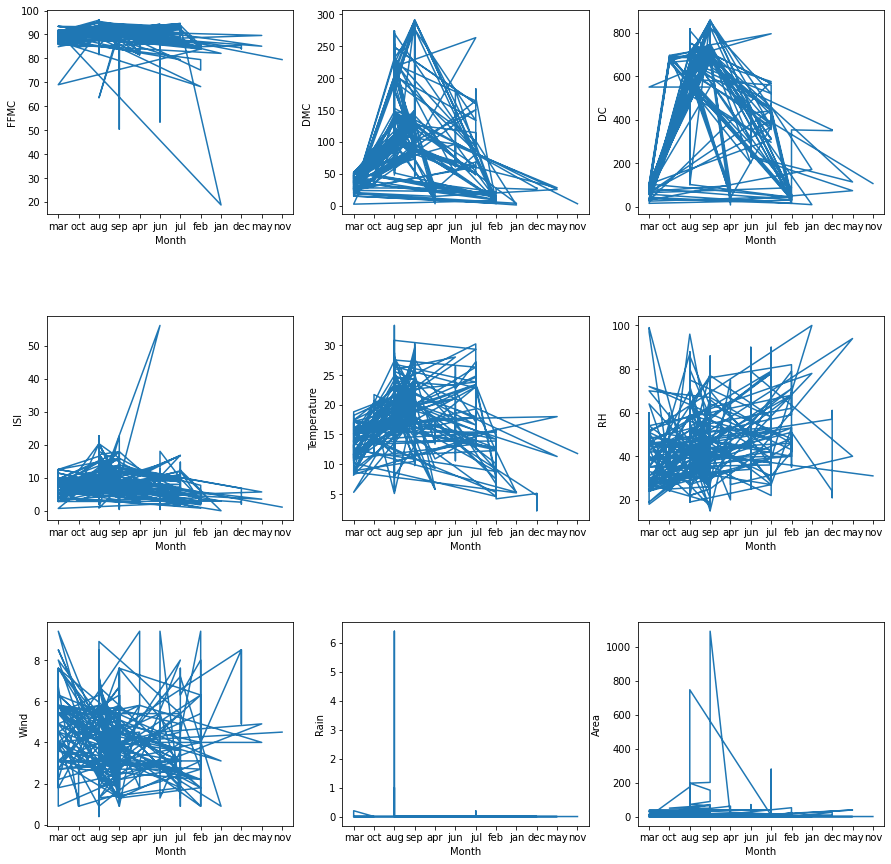

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3, 3, 1)
x=df['month']
y=df['FFMC']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("FFMC")

plt.subplot(3, 3, 2)
x=df['month']
y=df['DMC']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("DMC")

plt.subplot(3, 3, 3)
x=df['month']
y=df['DC']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("DC")

plt.subplot(3, 3, 4)
x=df['month']
y=df['ISI']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("ISI")

plt.subplot(3, 3, 5)
x=df['month']
y=df['temp']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Temperature")

plt.subplot(3, 3, 6)
x=df['month']
y=df['RH']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("RH")

plt.subplot(3, 3, 7)
x=df['month']
y=df['wind']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Wind")

plt.subplot(3, 3, 8)
x=df['month']
y=df['rain']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Rain")

plt.subplot(3, 3, 9)
x=df['month']
y=df['area']
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Area")

**Analysis:**
1. Rainfall in every month is almost equal of around 0-0.2 except in August month it is above 6mm.
2. Area burnt in every is almost equal about 0-10ha except september and april more than 1000ha area was burnt.  

**Multivariate Analysis:**

**1. Pair Plot:**

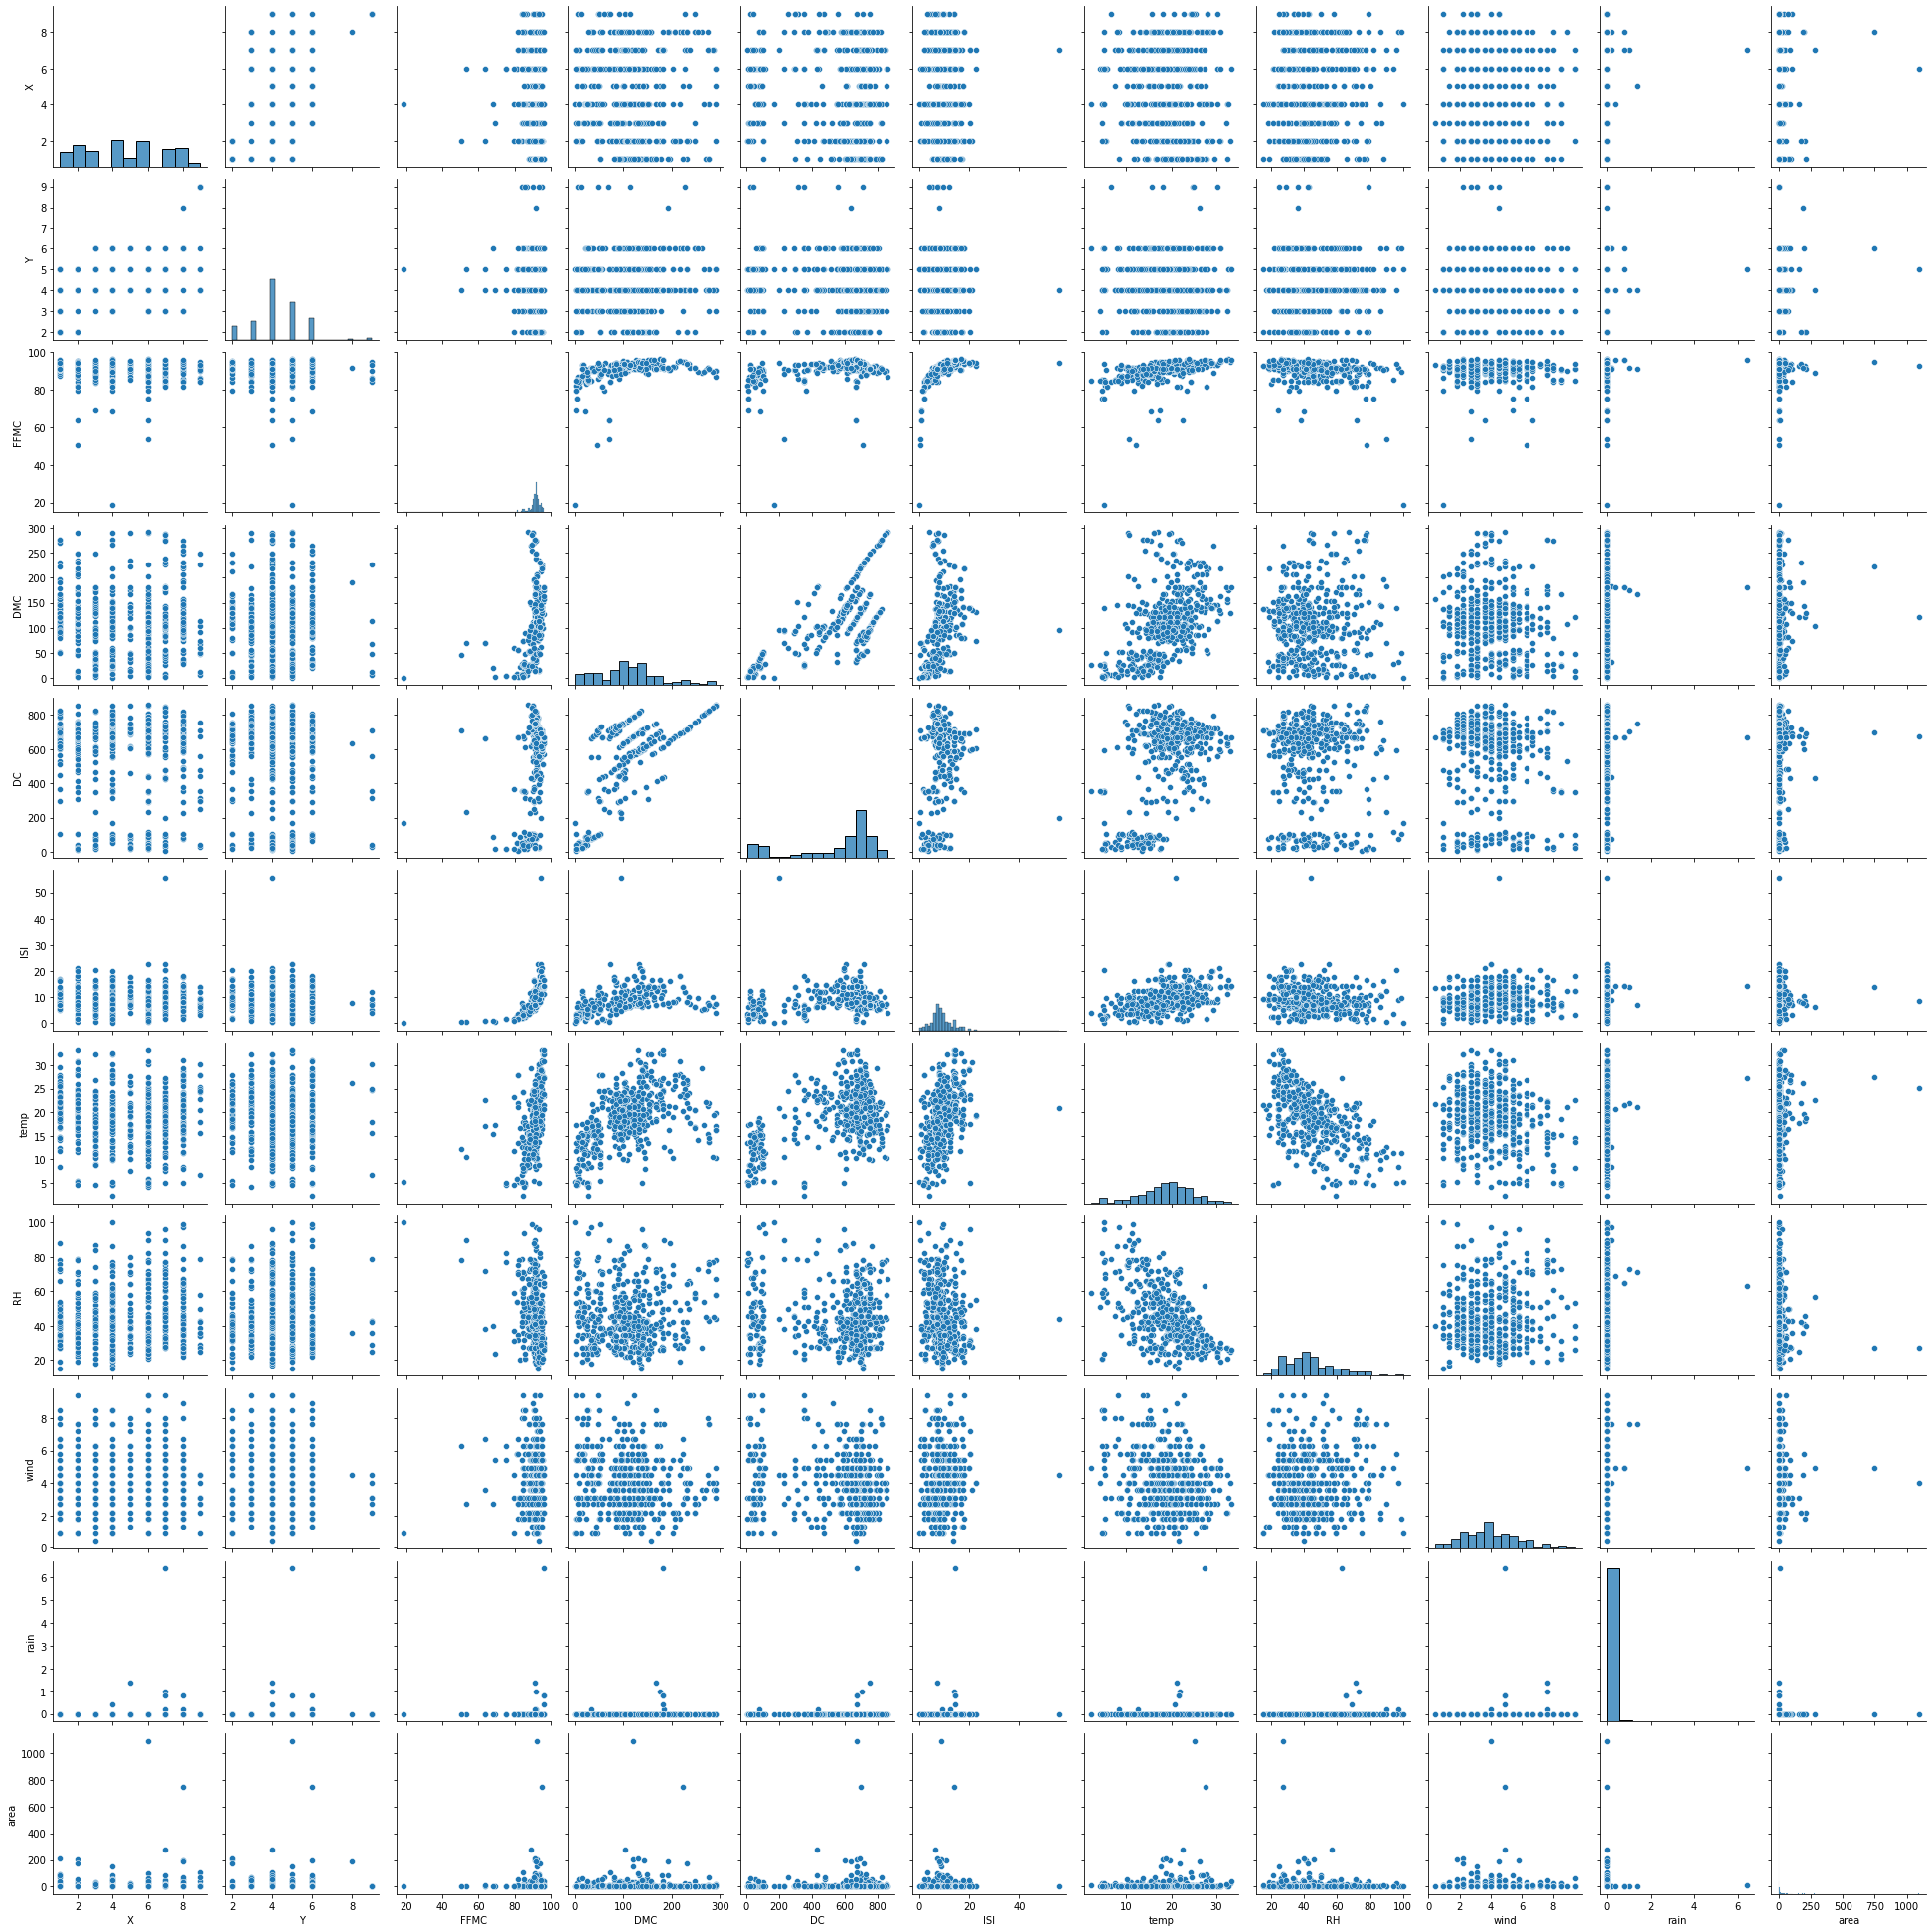

In [ ]:
sns.pairplot(df)

**Analysis:**
The pair plot gives a complete picture of all the features.

**Outlier Identification**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

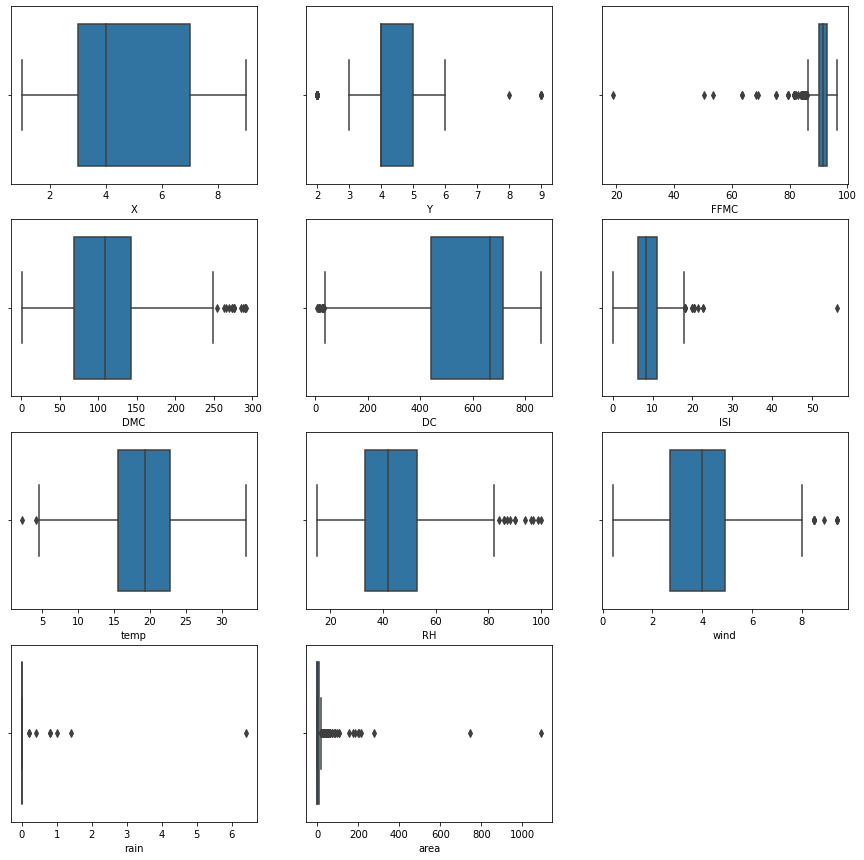

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 3, 1)
sns.boxplot(df['X'])

plt.subplot(4, 3, 2)
sns.boxplot(df['Y'])

plt.subplot(4, 3, 3)
sns.boxplot(df['FFMC'])

plt.subplot(4, 3, 4)
sns.boxplot(df['DMC'])

plt.subplot(4, 3, 5)
sns.boxplot(df['DC'])

plt.subplot(4, 3, 6)
sns.boxplot(df['ISI'])

plt.subplot(4, 3, 7)
sns.boxplot(df['temp'])

plt.subplot(4, 3, 8)
sns.boxplot(df['RH'])

plt.subplot(4, 3, 9)
sns.boxplot(df['wind'])

plt.subplot(4, 3, 10)
sns.boxplot(df['rain'])

plt.subplot(4, 3, 11)
sns.boxplot(df['area'])

**Outlier Handling**

In [ ]:
def outlier_handler(df, column):
  q1, q3 = np.percentile(df[column], [25, 75])
  iqr = q3 - q1;
  lb = q1 - iqr*1.5
  ub = q3 + iqr*1.5

  df.loc[df[column]>ub, column] = ub
  df.loc[df[column]<lb, column] = lb

**Replacing Upper Bound Outliers with Upper Bound Value**

**Replacing Lower Bound Outliers with Lower Bound Value**

In [ ]:
outlier_handler(df, 'X')
outlier_handler(df, 'Y')
outlier_handler(df, 'FFMC')
outlier_handler(df, 'DMC')
outlier_handler(df, 'DC')
outlier_handler(df, 'ISI')
outlier_handler(df, 'temp')
outlier_handler(df, 'RH')
outlier_handler(df, 'wind')
outlier_handler(df, 'rain')
outlier_handler(df, 'area')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

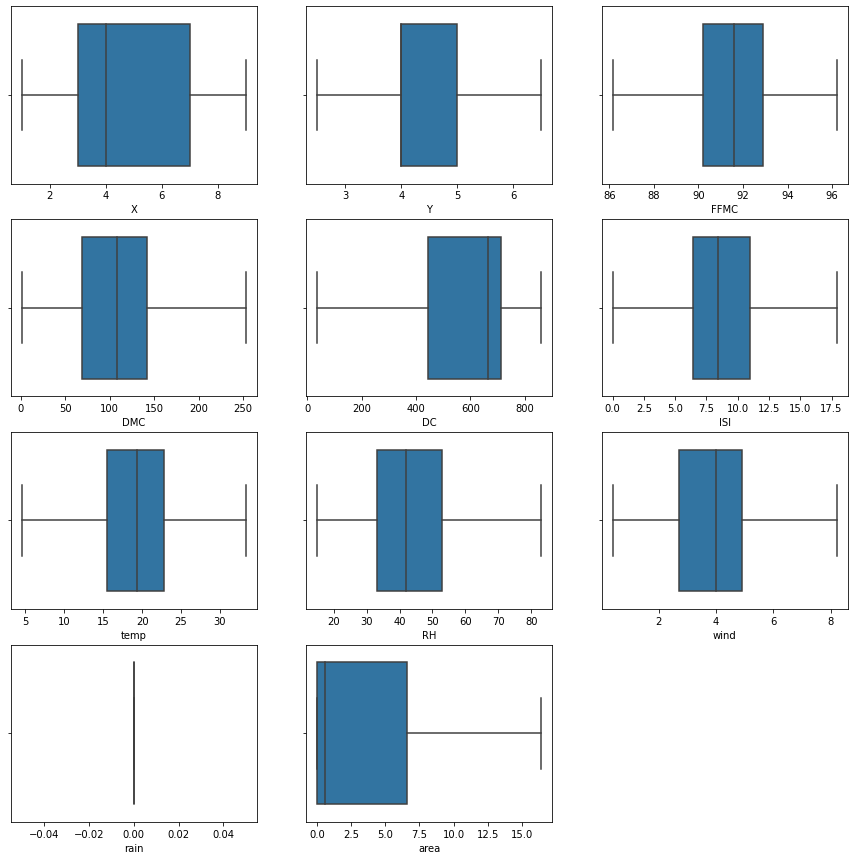

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 3, 1)
sns.boxplot(df['X'])

plt.subplot(4, 3, 2)
sns.boxplot(df['Y'])

plt.subplot(4, 3, 3)
sns.boxplot(df['FFMC'])

plt.subplot(4, 3, 4)
sns.boxplot(df['DMC'])

plt.subplot(4, 3, 5)
sns.boxplot(df['DC'])

plt.subplot(4, 3, 6)
sns.boxplot(df['ISI'])

plt.subplot(4, 3, 7)
sns.boxplot(df['temp'])

plt.subplot(4, 3, 8)
sns.boxplot(df['RH'])

plt.subplot(4, 3, 9)
sns.boxplot(df['wind'])

plt.subplot(4, 3, 10)
sns.boxplot(df['rain'])

plt.subplot(4, 3, 11)
sns.boxplot(df['area'])

**Outliers Handled**

**Encoding - One Hot Encoding**

In [ ]:
dummies = pd.get_dummies(df)
dummies.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4.0,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4.0,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6.0,91.7,33.3,77.5,9.0,8.3,83.0,4.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,8,6.0,89.3,51.3,102.2,9.6,11.4,83.0,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


**Splitting of Data into Contributing Factors and Target Variable**

In [ ]:
x = dummies.drop('area', axis=1)
y = dummies['area']

In [ ]:
x.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4.0,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4.0,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6.0,91.7,33.3,77.5,9.0,8.3,83.0,4.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,8,6.0,89.3,51.3,102.2,9.6,11.4,83.0,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

**Normalization**

In [ ]:
#Decimal Scaling Normalization of Contributing Factors (x)

x_decimal_scaled = x.copy()
for column in x_decimal_scaled.columns:
  max_b = str(int(x_decimal_scaled[column].max()))
  x_decimal_scaled[column] = x_decimal_scaled[column]/(10**len(max_b))

x_decimal_scaled

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0.7,0.5,0.8620,0.0262,0.0943,0.051,0.082,0.51,0.67,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
1,0.7,0.4,0.9060,0.0354,0.6691,0.067,0.180,0.33,0.09,0.0,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
2,0.7,0.4,0.9060,0.0437,0.6869,0.067,0.146,0.33,0.13,0.0,...,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
3,0.8,0.6,0.9170,0.0333,0.0775,0.090,0.083,0.83,0.40,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,0.6,0.8930,0.0513,0.1022,0.096,0.114,0.83,0.18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.4,0.3,0.8615,0.0567,0.6656,0.019,0.278,0.32,0.27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
513,0.2,0.4,0.8615,0.0567,0.6656,0.019,0.219,0.71,0.58,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
514,0.7,0.4,0.8615,0.0567,0.6656,0.019,0.212,0.70,0.67,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
515,0.1,0.4,0.9440,0.1460,0.6147,0.113,0.256,0.42,0.40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0


In [ ]:
#Decimal Scaling Normalization of Target Variable (y)
y_decimal_scaled = y.copy()
max_b = str(int(y_decimal_scaled.max()))
y_decimal_scaled = y_decimal_scaled/(10**len(max_b))

y_decimal_scaled

0      0.00000
1      0.00000
2      0.00000
3      0.00000
4      0.00000
        ...   
512    0.06440
513    0.16425
514    0.11160
515    0.00000
516    0.00000
Name: area, Length: 513, dtype: float64

In [ ]:
# # Min-Max Scaling of Contributing Factors (x)

# x_max_scaled = x.copy()

# for column in x_max_scaled.columns:
# x_max_scaled[column] = x_max_scaled[column] / x_max_scaled[column].abs().max()

# x_max_scaled

In [ ]:
# # Min-Max Scaling of Target Variable (y)

# y_max_scaled = y.copy()

# y_max_scaled = y_max_scaled / y_max_scaled.abs().max()

# y_max_scaled

In [ ]:
# #Z-Score Normalization of Contributing Factors (x)

# x_z_scaled = x.copy()

# for column in x_z_scaled.columns:
#     x_z_scaled[column] = (x_z_scaled[column] -
#                            x_z_scaled[column].mean()) / x_z_scaled[column].std()    

# x_z_scaled

In [ ]:
# #Z-Score Normalization of Target Variable (y)

# y_z_scaled = y.copy()

#     y_z_scaled = (y_z_scaled -
#                            y_z_scaled.mean()) / y_z_scaled.std()    

# y_z_scaled

**Train Test Split**

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# reg = RandomForestRegressor(n_estimators=100)
# reg.fit(x_train, y_train)
# y_pred = reg.predict(x_test)

**Model Building and Model Evaluation**

**K-Fold Cross Validation**

**Model - Linear Regression**

**Evaluation Metric - Mean Absolute Error (MAE)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import sqrt
from numpy import absolute
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_decimal_scaled, y_decimal_scaled, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores))

0.04755809713570324

**K-Fold Cross Validation**

**Model - Linear Regression**

**Evaluation Metric - Root Mean Squared Error (RMSE)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import sqrt
from numpy import absolute
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_decimal_scaled, y_decimal_scaled, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores))

0.05906640531548274

**K-Fold Cross Validation**

**Model - Random Forest Regressor**

**Evaluation Metric - Mean Absolute Error (MAE)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import sqrt
from numpy import absolute
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = RandomForestRegressor()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_decimal_scaled, y_decimal_scaled, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores))


0.04940205995165374

**K-Fold Cross Validation**

**Model - Random Forest Regressor**

**Evaluation Metric - Root Mean Squared Error (RMSE)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import sqrt
from numpy import absolute
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = RandomForestRegressor()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_decimal_scaled, y_decimal_scaled, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))


0.0609512947458661

**K-Fold Cross Validation**

**Model - XG Boost Regressor**

**Evaluation Metric - Mean Absolute Error (MAE)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from numpy import mean
from numpy import sqrt
from numpy import absolute
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = xgb.XGBRegressor()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_decimal_scaled, y_decimal_scaled, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.04982978664281142

**K-Fold Cross Validation**

**Model - XG Boost Regressor**

**Evaluation Metric - Root Mean Squared Error (RMSE)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from numpy import mean
from numpy import sqrt
from numpy import absolute
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = xgb.XGBRegressor()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_decimal_scaled, y_decimal_scaled, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.062093385205443

**K-Fold Cross Validation**

**Model - LGBM Regressor**

**Evaluation Metric - Mean Absolute Error (MAE)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from numpy import mean
from numpy import sqrt
from numpy import absolute
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LGBMRegressor()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_decimal_scaled, y_decimal_scaled, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.05057538187037132

**K-Fold Cross Validation**

**Model - LGBM Regressor**

**Evaluation Metric - Root Mean Squared Error (RMSE)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from numpy import mean
from numpy import sqrt
from numpy import absolute

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LGBMRegressor()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_decimal_scaled, y_decimal_scaled, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores))

0.06450421906357007

**Hyperparameter Tuning - Random Forest Regressor**

**Randomized Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
search_mae = RandomizedSearchCV(model, param_grid, scoring="neg_mean_absolute_error")
result_mae = search_mae.fit(x_decimal_scaled, y_decimal_scaled)

search_rmse = RandomizedSearchCV(model, param_grid, scoring="neg_root_mean_squared_error")
result_rmse = search_rmse.fit(x_decimal_scaled, y_decimal_scaled)

print("The best result for MAE is: ", result_mae.best_score_)
print("The best hyperparameters are: ", result_mae.best_params_)

print("The best result for RMSE is: ", result_rmse.best_score_)
print("The best hyperparameters are: ", result_rmse.best_params_)

The best result for MAE is:  -0.050143706232531726
The best hyperparameters are:  {'n_estimators': 50, 'max_leaf_nodes': 3, 'max_features': 'log2', 'max_depth': 9}
The best result for RMSE is:  -0.060076642317003916
The best hyperparameters are:  {'n_estimators': 50, 'max_leaf_nodes': 3, 'max_features': 'log2', 'max_depth': 9}


**Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
search_mae = GridSearchCV(model, param_grid, scoring="neg_mean_absolute_error")
result_mae = search_mae.fit(x_decimal_scaled, y_decimal_scaled)

search_rmse = RandomizedSearchCV(model, param_grid, scoring="neg_root_mean_squared_error")
result_rmse = search_rmse.fit(x_decimal_scaled, y_decimal_scaled)

print("The best result for MAE is: ", result_mae.best_score_)
print("The best hyperparameters are: ", result_mae.best_params_)

print("The best result for RMSE is: ", result_rmse.best_score_)
print("The best hyperparameters are: ", result_rmse.best_params_)

The best result for MAE is:  -0.04996552946709316
The best hyperparameters are:  {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 3, 'n_estimators': 25}
The best result for RMSE is:  -0.06098115358985593
The best hyperparameters are:  {'n_estimators': 50, 'max_leaf_nodes': 9, 'max_features': 'log2', 'max_depth': 3}


**Optuna**

In [ ]:
#Using Optuna For Automated Hyperparameter Tuning and Optimization
import optuna
import sklearn
from sklearn.model_selection import cross_val_score

def objective(trial):
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
  max_depth = trial.suggest_int('max_depth', 2, 20, log=True)
  max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 3, 6, 9)
  n_estimators = trial.suggest_int('n_estimators', 50, 150)

  rfr = sklearn.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, max_leaf_nodes=max_leaf_nodes)
  scores = cross_val_score(rfr, x, y, n_jobs=-1, cv=3, scoring="neg_mean_absolute_error")

  return scores.mean()

study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

[I 2023-02-16 14:25:31,520] A new study created in memory with name: no-name-cf50225c-944b-4df7-b87b-2f023e858751
[I 2023-02-16 14:25:33,002] Trial 0 finished with value: -5.649669780351985 and parameters: {'max_features': 'sqrt', 'max_depth': 3, 'max_leaf_nodes': 3, 'n_estimators': 133}. Best is trial 0 with value: -5.649669780351985.
[I 2023-02-16 14:25:33,757] Trial 1 finished with value: -5.641315607173486 and parameters: {'max_features': 'log2', 'max_depth': 3, 'max_leaf_nodes': 3, 'n_estimators': 66}. Best is trial 1 with value: -5.641315607173486.
[I 2023-02-16 14:25:34,687] Trial 2 finished with value: -5.623331973097585 and parameters: {'max_features': 'log2', 'max_depth': 2, 'max_leaf_nodes': 3, 'n_estimators': 148}. Best is trial 2 with value: -5.623331973097585.
[I 2023-02-16 14:25:35,293] Trial 3 finished with value: -5.649779459624668 and parameters: {'max_features': 'sqrt', 'max_depth': 12, 'max_leaf_nodes': 3, 'n_estimators': 101}. Best is trial 2 with value: -5.6233319